In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import Lasso

In [2]:
import io

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving Online_Retail.xlsx to Online_Retail.xlsx


# Lectura de los datos

In [5]:
X = pd.read_excel(io.BytesIO(uploaded['Online_Retail.xlsx']))
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Preparación de los datos

Se filtran por consumidores no nulos

In [6]:
no_nulos = X["CustomerID"].notnull()
X = X[no_nulos]
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Se filtran por precios mayores a 0

In [7]:
valor_mayores_cero = X["UnitPrice"] > 0
X = X[valor_mayores_cero]
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Se filtra por cantidades mayores a cero

In [8]:
cantidad_mayores_cero = X["Quantity"] > 0
X = X[cantidad_mayores_cero]
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Se filtra por no canceladas

In [10]:
 X1 = X
 X1['InvoiceNo'] = X1['InvoiceNo'].astype('str')
cancel = X1['InvoiceNo']
X1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Histograma de precios

Text(0, 0.5, 'Frecuencia')

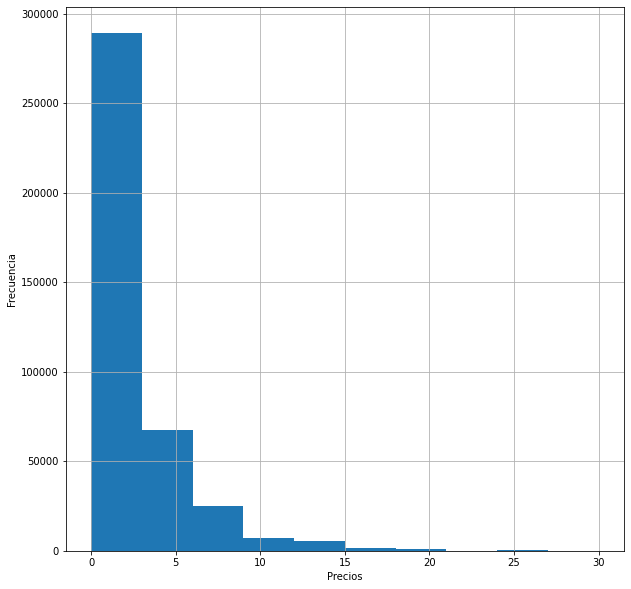

In [11]:
histograma = X['UnitPrice'].hist(range=(0,30), figsize=(10, 10))
histograma.set_xlabel("Precios")
histograma.set_ylabel("Frecuencia")

Histograma de cantidades

Text(0, 0.5, 'Frecuencia')

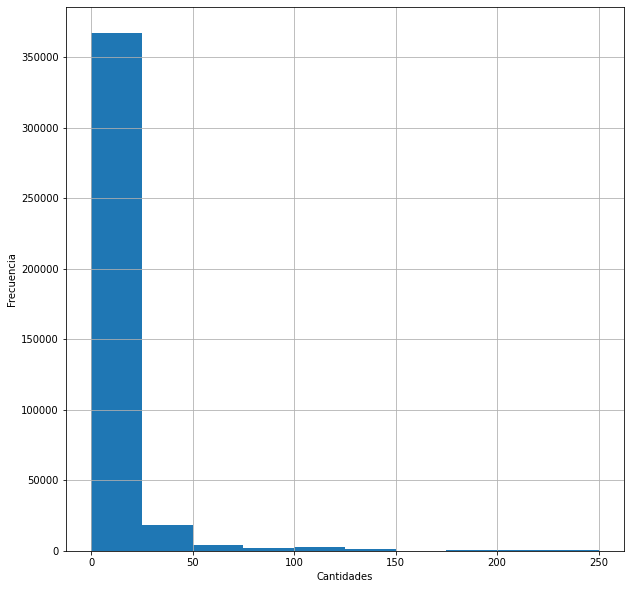

In [12]:
histograma = X['Quantity'].hist(range=(0,250),figsize=(10, 10))
histograma.set_xlabel("Cantidades")
histograma.set_ylabel("Frecuencia")

Países de las mayores compras:

In [13]:
X['Country'].value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

Clientes con mayores compras:

In [14]:
X['CustomerID'].value_counts()

17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
17443.0       1
16738.0       1
14351.0       1
16742.0       1
15118.0       1
Name: CustomerID, Length: 4338, dtype: int64

Filtrado de ventas de 2010

In [15]:
fecha_2010 = X['InvoiceDate'].map(lambda fecha: str(fecha)[3]=='0')
valores_2010 = X[fecha_2010]
valores_2010.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Filtrado de ventas de 2011

In [16]:
fecha_2011 = X['InvoiceDate'].map(lambda fecha: str(fecha)[3]=='1')
valores_2011 = X[fecha_2011]
valores_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


Generación de columna del valor total (UnitPrice* Quantity) para 2010

In [17]:
valores_2010['TotalSale'] = valores_2010['Quantity'].astype(int) * valores_2010['UnitPrice'].astype(float)
valores_2010['TotalSale'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: TotalSale, dtype: float64

In [18]:
valores_2010.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Generación de columna del valor total (UnitPrice* Quantity) para 2011

In [19]:
valores_2011['TotalSale'] = valores_2011['Quantity'].astype(int) * valores_2011['UnitPrice'].astype(float)
valores_2011['TotalSale'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


42481    19.5
42482    10.5
42483    10.5
42484    10.5
42485    12.5
Name: TotalSale, dtype: float64

In [20]:
valores_2011.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSale
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5


Suma de ventas en todo el 2010

In [52]:
ventas_totales_2010 = 0.0
for valor in valores_2010['TotalSale']:
  ventas_totales_2010+=valor
print("Ventras diciembre 2010: ",ventas_totales_2010)

Ventras diciembre 2010:  572713.8900000163


Suma de ventas en todo el 2011

In [54]:
ventas_totales_2011 = 0.0
for valor in valores_2011['TotalSale']:
  ventas_totales_2011+=valor
print("Ventas por mes promedio 2011: ",ventas_totales_2011/12)

Ventas por mes promedio 2011:  694891.167833612


# Predicción de ventas

In [55]:
from sklearn.linear_model import LinearRegression

Preparación de listas arrays para regresión lineal

In [60]:
arr_ventas = np.array([ventas_totales_2010, ventas_totales_2011/12])
model = LinearRegression()

Método de regresión lineal con numpy

In [61]:
m, b = np.polyfit(np.array([2010, 2011]), arr_ventas, 1)

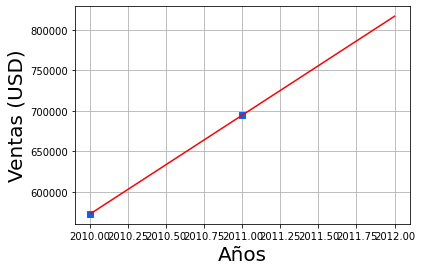

In [62]:
plt.plot(np.array([2010, 2011]),arr_ventas,'s',color='#0066FF')
plt.plot(np.array([2010, 2011, 2012]), m*np.array([2010, 2011, 2012]) + b, 'r-') 
plt.xlabel('Años',fontsize=20)
plt.ylabel('Ventas (USD)',fontsize=20)
plt.autoscale(enable=True, axis=u'both', tight=False)
plt.grid(True)
plt.show()

Predicción de ventas para 2012 con regresión de numpy

In [63]:
predict_2012_np = m*np.array([2012]) + b
predict_2012_np

array([817068.44566721])

Método de regresión lineal con Scikit-learn

In [64]:
model.fit(years, arr_ventas)
predict_2012_LR_model = model.predict(np.array(2012).reshape(-1,1))
print("Score:",model.score(years, arr_ventas))
print("Predicción: ", predict_2012_LR_model)

Score: 1.0
Predicción:  [817068.44566718]


# Resultados

Como podemos ver, las dos regresiones al ser lineales y basadas en dos puntos, generan la misma ecuación y por lo tanto la misma predicción para 2012

# Otras regresiones más avanzadas

Además de las regresiones lineales vistas previamente existen otra regresiones con la capacidad de tener en cuenta varias columnas, es decir, aprovechar los datos de cuál cliente es, de qué país es la compra, entre otros "features".

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

In [ ]:
model = Lasso()

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(model.score(X_test, Y_test))